# Decision Tree

In [ ]:
# Base
from typing import Tuple
import pandas as pd
import numpy as np
import gc
import time
from tqdm import tqdm

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.tree import DecisionTreeClassifier

# Scoring
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Daten laden

In [2]:
train = pd.read_parquet('../data/processed/train_series_split.parquet')
validation = pd.read_parquet('../data/processed/validation_series_split.parquet')

In [3]:
train.head()

,series_id,step,timestamp,anglez,enmo,awake,hour,anglez_abs,anglez_diff,enmo_diff,anglez_x_enmo,anglez_rolling_mean,enmo_rolling_mean,anglez_rolling_max,enmo_rolling_max,anglez_rolling_min,enmo_rolling_min,anglez_rolling_std,enmo_rolling_std
0,038441c925bb,0,2018-08-14 15:30:00,2.6367,0.0217,1,15,2.6367,41.462601,-0.0047,0.057216,7.573975,0.02233,54.8498,0.0395,2.4129,0.0166,15.339381,0.004213
1,038441c925bb,1,2018-08-14 15:30:05,2.6368,0.0215,1,15,2.6368,41.462601,-0.0047,0.056691,7.573975,0.02233,54.8498,0.0395,2.4129,0.0166,15.339381,0.004213
2,038441c925bb,2,2018-08-14 15:30:10,2.6370,0.0216,1,15,2.6370,41.462601,-0.0047,0.056959,7.573975,0.02233,54.8498,0.0395,2.4129,0.0166,15.339381,0.004213
3,038441c925bb,3,2018-08-14 15:30:15,2.6368,0.0213,1,15,2.6368,41.462601,-0.0047,0.056164,7.573975,0.02233,54.8498,0.0395,2.4129,0.0166,15.339381,0.004213
4,038441c925bb,4,2018-08-14 15:30:20,2.6368,0.0215,1,15,2.6368,41.462601,-0.0047,0.056691,7.573975,0.02233,54.8498,0.0395,2.4129,0.0166,15.339381,0.004213


## Hyperparams

In [4]:
RANDOM_STATE = 42
features = ['anglez', 'enmo',
            'hour',
            'anglez_abs', 'anglez_diff', 'enmo_diff', 'anglez_x_enmo',
            'anglez_rolling_mean', 'enmo_rolling_mean', 'anglez_rolling_max', 'enmo_rolling_max', 'anglez_rolling_min',
            'anglez_rolling_std', 'enmo_rolling_std']
target_column = ['awake']

## Datenaufbereitung

In [6]:
X_train = train[features]
y_train = train[target_column]
X_validation = validation[features]
y_validation = validation[target_column]

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

(98634780, 14)
(98634780, 1)
(26187300, 14)
(26187300, 1)


## Pipeline

In [8]:
dt_classifier = Pipeline([
        ('scale', StandardScaler()),
        ('dt', DecisionTreeClassifier(random_state=RANDOM_STATE))])

## Training

In [9]:
start_time = time.time()
dt_classifier.fit(X_train, y_train)
print(f'Training took {time.time() - start_time} seconds')

Training took 6576.07088637352 seconds


## Prediction

In [10]:
start_time = time.time()

y_validation_preds = []

for series_id in tqdm(validation.series_id.unique()):
    validation_chunk = validation[validation.series_id == series_id]
    X_validation_chunk = validation_chunk[features]
    
    y_validation_pred_chunk = dt_classifier.predict(X_validation_chunk)
    y_validation_preds.append(y_validation_pred_chunk)
    
    del X_validation_chunk
    del y_validation_pred_chunk
    gc.collect()

y_validation_pred = np.concatenate(y_preds)

print(f'Prediction took {time.time() - start_time} seconds')

Step 1 of 54
Step 2 of 54
Step 3 of 54
Step 4 of 54
Step 5 of 54
Step 6 of 54
Step 7 of 54
Step 8 of 54
Step 9 of 54
Step 10 of 54
Step 11 of 54
Step 12 of 54
Step 13 of 54
Step 14 of 54
Step 15 of 54
Step 16 of 54
Step 17 of 54
Step 18 of 54
Step 19 of 54
Step 20 of 54
Step 21 of 54
Step 22 of 54
Step 23 of 54
Step 24 of 54
Step 25 of 54
Step 26 of 54
Step 27 of 54
Step 28 of 54
Step 29 of 54
Step 30 of 54
Step 31 of 54
Step 32 of 54
Step 33 of 54
Step 34 of 54
Step 35 of 54
Step 36 of 54
Step 37 of 54
Step 38 of 54
Step 39 of 54
Step 40 of 54
Step 41 of 54
Step 42 of 54
Step 43 of 54
Step 44 of 54
Step 45 of 54
Step 46 of 54
Step 47 of 54
Step 48 of 54
Step 49 of 54
Step 50 of 54
Step 51 of 54
Step 52 of 54
Step 53 of 54
Step 54 of 54
Prediction took 83.52332663536072 seconds


In [11]:
print(y_validation.shape)
print(y_validation_pred.shape)

(26187300, 1)
(26187300,)


## Evaluate

In [12]:
accuracy_score(y_validation, y_validation_pred)

0.8738669889602976

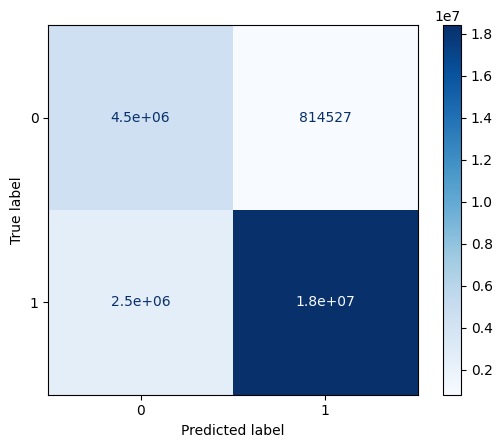

In [13]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')